In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Detecting trends: Hodrick-Prescott filter (hp_filter)

The Hodrick-Prescott (HP) filter has become a benchmark for getting rid of trend movements in data. This method is broadly employed for econometric methods in applied macroeconomics research. The technique is nonparametric and is used to dissolve a time series into a trend; it is a cyclical component unaided by economic theory or prior trend specification.

This function takes two parameters into account:
- 1D array
- lambda (1600 for quarterly, 6.25 for annual, 129600 for monthly)


In [2]:
df = pd.read_excel('data/edge_techniques/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)
df

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


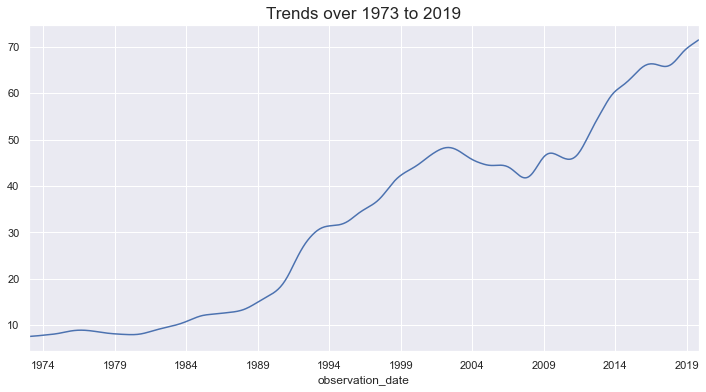

In [3]:
cycle, trend = hpfilter(df.EXINUS, lamb=1600)

title = f'Trends over {df.index.min().year} to {df.index.max().year}'
trend.plot(figsize=(12, 6)).autoscale(axis='x', tight=True)
plt.title(title, fontsize=17)
plt.show()

### Detrending a time series

Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time. It is continuously increasing or decreasing over the duration of time. Identification, modeling, and even removing trend data from time-series datasets can be beneficial. The following are methods to detrend time-series data:
- pandas differencing
- scipy signal
- hp filter

#### Pandas differencing


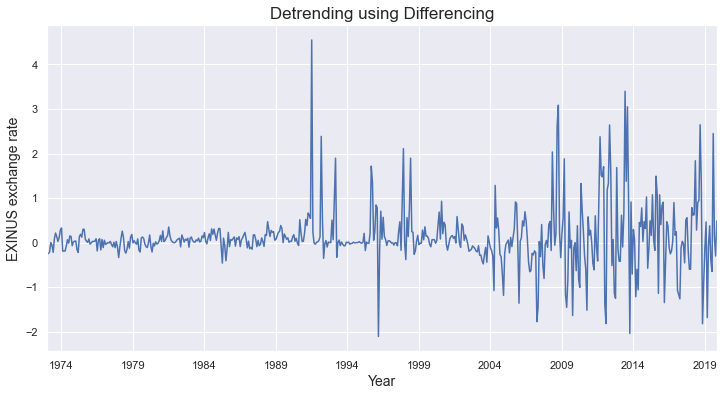

In [4]:
diff = df.EXINUS.diff()

diff.plot(figsize=(12, 6))
plt.title('Detrending using Differencing', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.ylabel('EXINUS exchange rate', fontsize=14)
plt.show()

### Detrending using a SciPy Signal

A signal is another form of time-series data . Every signal either increases or decreases in a different order. Using the SciPy library, this can be removing the linear trend from the signal data.

In [32]:
from scipy import signal

detrend = signal.detrend(df.EXINUS.values)
df['detrend'] = detrend

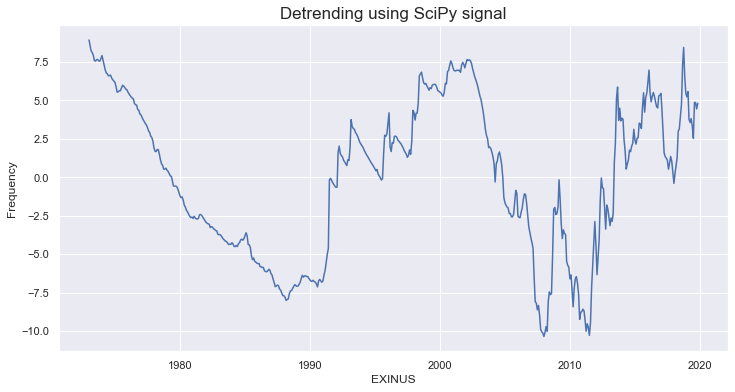

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Detrending using SciPy signal', fontsize=17)
plt.plot(df['detrend'])
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.show()

### Detrending using HP filter

An HP filter is also used to detrend a time series and smooth the data. It’s used for removing short-term fluctuations.

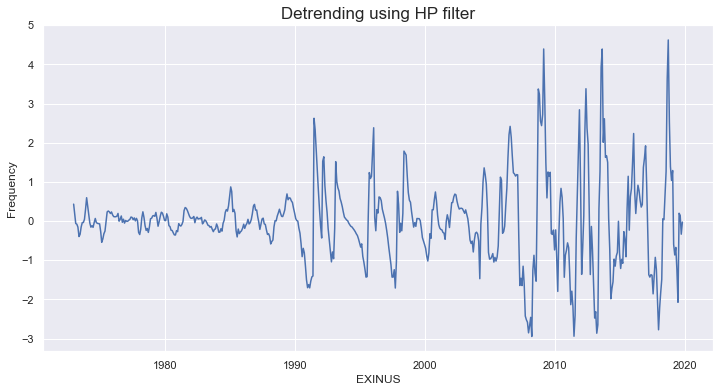

In [7]:
cycle, trend = hpfilter(df.EXINUS)

df['trend'] = trend
detrended = df.EXINUS - df['trend']

plt.figure(figsize=(12, 6))
plt.title('Detrending using HP filter', fontsize=17)
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.show()

### Multiple boxplot for TTA insights

In [8]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', name='observation_date', length=563)

In [10]:
df['month'] = df.index.month
df['year']  = df.index.year
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

df.head(3)

,EXINUS,trend,month,year
observation_date,,,,
1973-01-01,8.0041,7.571541,Jan,1973
1973-02-01,7.7538,7.589325,Feb,1973
1973-03-01,7.5465,7.607379,Mar,1973


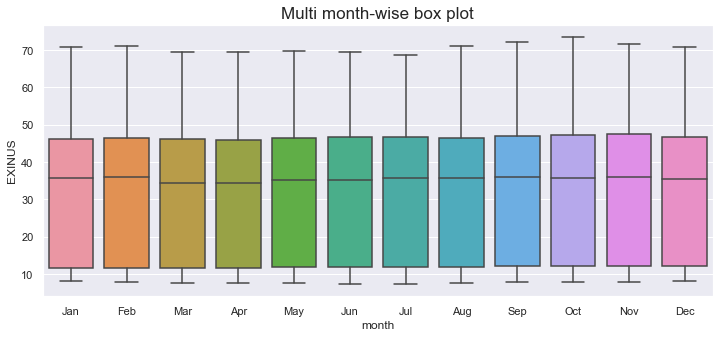

In [12]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='month', y='EXINUS', data=df)\
   .set_title('Multi month-wise box plot',
              fontsize=17)
plt.show()

### Autocorrelation plot

Autocorrelation is used to check randomness in data. It helps to identify types of data where the period is not known. For instance, for the monthly data, if there is a regular seasonal effect, we would hope to see massive peak lags after every 12 months.

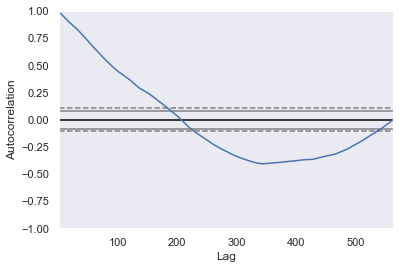

In [45]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.EXINUS.tolist())
plt.show()

### Comparison of three data smoothing techniques

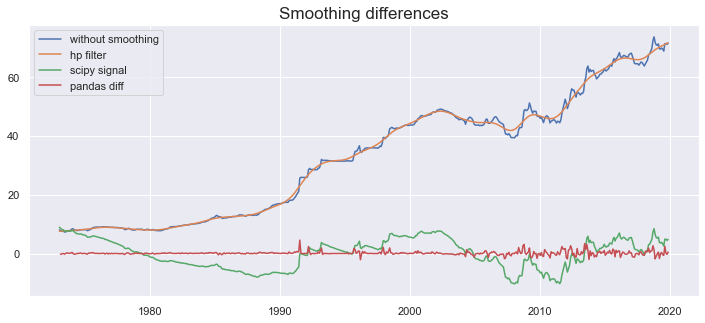

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(df.EXINUS,     label='without smoothing')
plt.plot(trend,         label='hp filter')
plt.plot(df['detrend'], label='scipy signal')
plt.plot(diff,          label='pandas diff')

plt.title('Smoothing differences', fontsize=17)
plt.legend()
plt.show()

In [39]:
# create a mask to focus on period [1990-2000]
mask = (df.index > '1990-01-01') & (df.index < '2000-01-01')

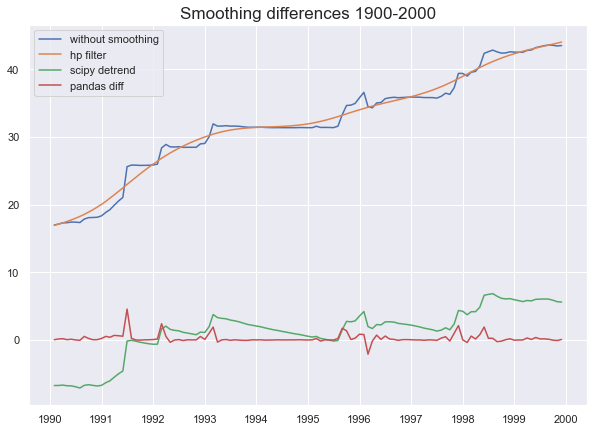

In [43]:
# zoom in
plt.figure(figsize=(10, 7))
plt.plot(df.loc[mask].EXINUS,  label='without smoothing')
plt.plot(trend.loc[mask],      label='hp filter')
plt.plot(df.loc[mask].detrend, label='scipy detrend')
plt.plot(diff.loc[mask],       label='pandas diff')

plt.title('Smoothing differences 1900-2000', fontsize=17)
plt.legend()
plt.show()